In [1]:
import numpy as np
from skimage.io import imshow
from napari_skeleton_analysis import skeletonize, branch_statistics, skeleton_image, path_label_image, path_length_image, branch_lines, branch_type_lines, degree_image

In [2]:
image = np.asarray([
  [0,0,0,1,0,0,0,1,0],
  [1,1,1,1,1,1,1,1,0],
  [0,0,1,0,1,0,0,1,0],
  [0,0,1,0,1,1,1,1,1],
  [0,0,0,0,1,0,0,1,0],
  [0,0,0,0,0,0,1,1,1],
  [1,1,0,0,0,0,0,1,0],
  [0,0,0,1,1,1,1,1,0],
])

C:\Users\rober\miniconda3\envs\bio_39\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


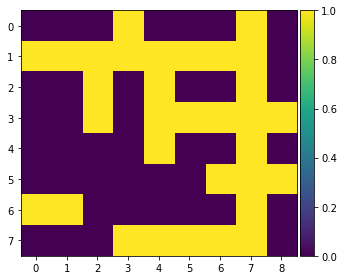

In [3]:
imshow(image)

C:\Users\rober\miniconda3\envs\bio_39\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


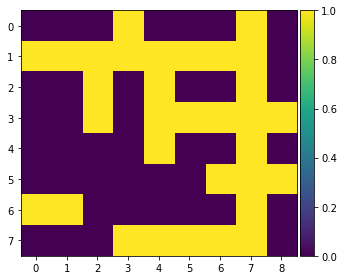

In [4]:
imshow(skeleton_image(image))

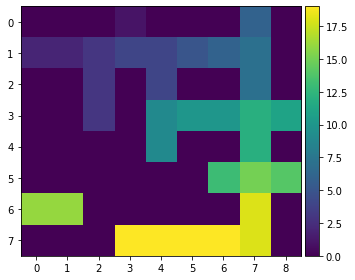

In [5]:
path_image = path_label_image(image)
imshow(path_image)

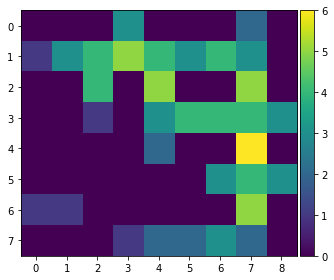

In [6]:
imshow(degree_image(image))

In [7]:
stats = branch_statistics(image)
stats

,skeleton-id,node-id-src,node-id-dst,branch-distance,branch-type,mean-pixel-value,stdev-pixel-value,image-coord-src-0,image-coord-src-1,image-coord-dst-0,image-coord-dst-1,coord-src-0,coord-src-1,coord-dst-0,coord-dst-1,euclidean-distance
0,1,1,6,1.000000,1,1.0,0.0,0.0,3.0,1.0,3.0,0.0,3.0,1.0,3.0,1.000000
1,1,3,5,2.000000,1,1.0,0.0,1.0,0.0,1.0,2.0,1.0,0.0,1.0,2.0,2.000000
2,1,5,14,2.000000,1,1.0,0.0,1.0,2.0,3.0,2.0,1.0,2.0,3.0,2.0,2.000000
3,1,6,15,3.000000,2,1.0,0.0,1.0,3.0,3.0,4.0,1.0,3.0,3.0,4.0,2.236068
4,1,8,9,1.000000,1,1.0,0.0,1.0,5.0,1.0,6.0,1.0,5.0,1.0,6.0,1.000000
5,1,9,10,2.414214,2,1.0,0.0,1.0,6.0,1.0,7.0,1.0,6.0,1.0,7.0,1.000000
6,1,10,18,2.000000,2,1.0,0.0,1.0,7.0,3.0,7.0,1.0,7.0,3.0,7.0,2.000000
7,1,15,16,1.000000,2,1.0,0.0,3.0,4.0,3.0,5.0,3.0,4.0,3.0,5.0,1.000000
8,1,15,16,2.414214,2,1.0,0.0,3.0,4.0,3.0,5.0,3.0,4.0,3.0,5.0,1.000000
9,1,16,18,2.000000,2,1.0,0.0,3.0,5.0,3.0,7.0,3.0,5.0,3.0,7.0,2.000000


In [8]:
import skan
skan.summary_utils.find_main_branches?

Signature: skan.summary_utils.find_main_branches(summary: pandas.core.frame.DataFrame) -> numpy.ndarray
Docstring:
Predict the extent of branching.

Parameters
----------
summary : pd.DataFrame
    The summary table of the skeleton to analyze.
    This must contain: ['node-id-src', 'node-id-dst', 'branch-distance']

Returns
-------
is_main: array
   True if the index-matched path is the longest shortest path of the
   skeleton
File:      c:\users\rober\miniconda3\envs\bio_39\lib\site-packages\skan\summary_utils.py
Type:      function


In [9]:
skan.Skeleton.prune_paths?

Signature: skan.Skeleton.prune_paths(self, indices) -> 'Skeleton'
Docstring: <no docstring>
File:      c:\users\rober\miniconda3\envs\bio_39\lib\site-packages\skan\csr.py
Type:      function


C:\Users\rober\miniconda3\envs\bio_39\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


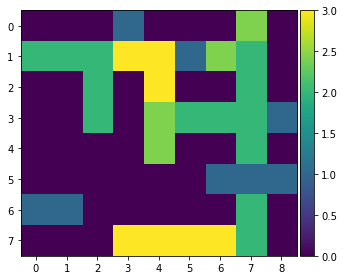

In [10]:
path_lengths_image = path_length_image(image)
imshow(path_lengths_image)

In [11]:

def _skeleton_to_networkx(skeleton: skan.Skeleton) -> "networkx.Graph":
    """
    Converts a skeleton to a networkx graph
    
    See Also
    --------
    ..[1] https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.from_numpy_matrix.html
    """
    import networkx
    cs_graph = skeleton_to_csgraph(skeleton.skeleton_image)

    adjacency_matrix = cs_graph[0]
    centroids = cs_graph[1]
        
    networkx_graph = networkx.from_scipy_sparse_array(adjacency_matrix)

    if centroids is not None:
        centroid_positions = centroids

        for n in range(len(networkx_graph.nodes)):
            networkx_graph.nodes[n]['pos'] = np.asarray(centroid_positions[n])

    return networkx_graph

nxg = _skeleton_to_networkx(image_to_skeleton(image))
nxg

NameError: name 'image_to_skeleton' is not defined